In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from utils.augmentation import get_training_augmentation, get_preprocessing, offline_augmentation
from sklearn.model_selection import train_test_split
import random
import cv2

### This notebook is to create visualizations used in the thesis

In [22]:
############## Visualize IR ################
def visualize_ir(img, idx=None, cmap='cividis', colorbar=False, save_path=None):
    plt.imshow(img, cmap=cmap)

    if colorbar:
        plt.colorbar()
    
    if not save_path==None:
        #img = np.clip(img, 273, 276)
        #cv2.imwrite(os.path.join(save_path, '{}.png'.format(idx)), img)
        plt.imsave(os.path.join(save_path, '{}.png'.format(idx)), img, cmap='gray')

In [3]:
def visualize_random_pairs(imgs, masks, cmap='cividis'):
    image_number = random.randint(0, len(imgs))
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(imgs[image_number], cmap=cmap)
    plt.subplot(122)
    plt.imshow(masks[image_number], cmap=cmap)
    #plt.imshow(np.reshape(masks[image_number], (256, 256)), cmap='gray')
    plt.show()

In [7]:
def visualize_pairs(imgs, masks, idx, cmap='cividis'):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(imgs[idx], cmap=cmap)
    #plt.imshow(imgs[idx, :,:, 0], cmap=cmap)
    plt.subplot(122)
    plt.imshow(masks[idx], cmap=cmap)
    #plt.imshow(np.reshape(masks[image_number], (256, 256)), cmap='gray')
    plt.show()

In [2]:
X32 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/32_im.npy')
y32 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/32_ma.npy')
X64 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/64_im.npy')
y64 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/64_ma.npy')
X128 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/128_im.npy')
y128 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/128_ma.npy')
X256 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/256_im.npy')
y256 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/256_ma.npy')
X480 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_im.npy')
y480 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_ma.npy')

In [79]:
# train test baseline
trainX = np.load('E:/polar/code/data/ir/prefinal/resnet_xtrain.npy')
trainy = np.load('E:/polar/code/data/ir/prefinal/resnet_ytrain.npy')
testX = np.load('E:/polar/code/data/ir/prefinal/resnet_xtest.npy')
testy = np.load('E:/polar/code/data/ir/prefinal/resnet_ytest.npy')

#### Image pairs

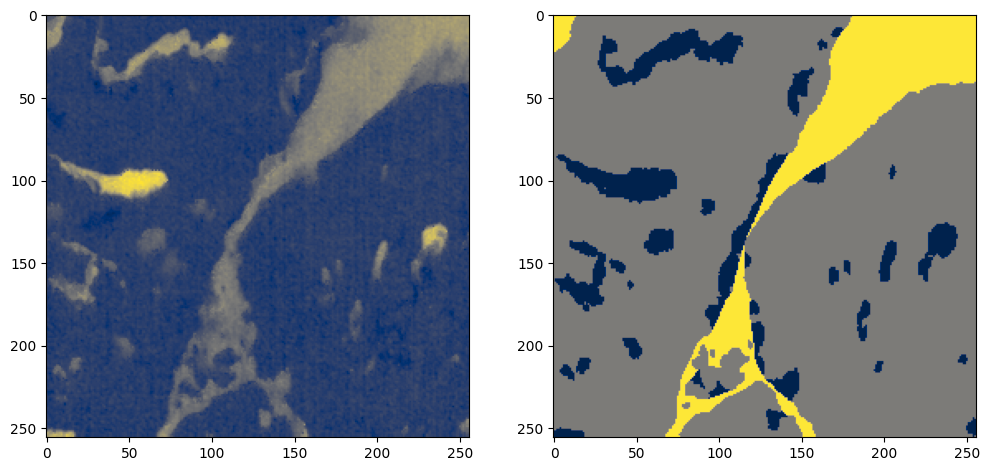

In [81]:
visualize_pairs(testX,testy,1)

#### Augmentation Results

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X256, y256, test_size=0.2, random_state=42)

X_train_new, y_train_new, imaug, maaug = offline_augmentation(X_train, y_train, im_size=256, mode=4, factor=5)

print(X_train_new.shape)

save_path = 'E:/polar/code/data/ir/test_augmentation/'

for idx, i in enumerate(maaug):
    #cv2.imwrite(os.path.join(save_path, '{}.png'.format(idx)), i)
    print(np.unique(i))
for idx, i in enumerate(y_train_new):
    #cv2.imwrite(os.path.join(save_path, '{}masks.png'.format(idx)), i)
    print('hi')


(125, 256, 256)
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


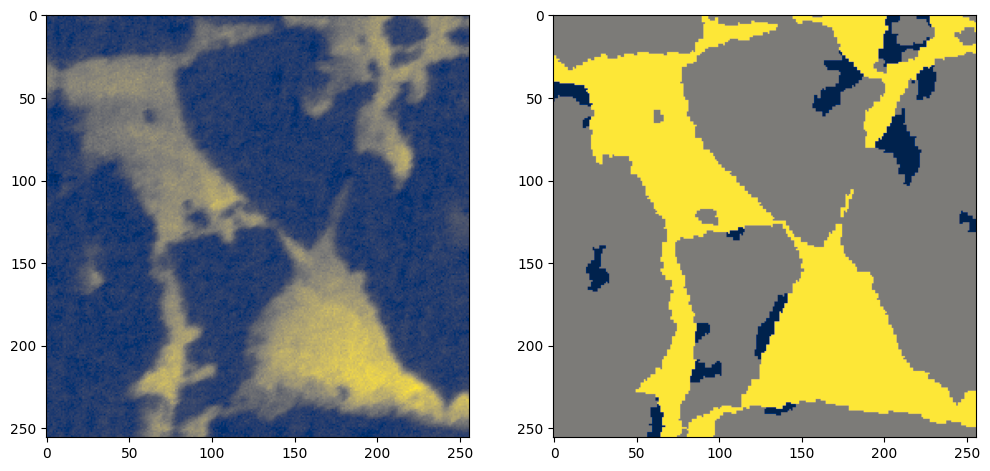

In [12]:
visualize_pairs(X_train_new, y_train_new, 25)

#### Model Scores

In [135]:
import pickle

with open('augment_mode4_trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

print(history)

{'loss': [0.3321841359138489, 0.26780927181243896, 0.2578143775463104, 0.25215384364128113, 0.24691985547542572, 0.24442650377750397, 0.2437295913696289, 0.23616640269756317, 0.22650764882564545, 0.23894862830638885, 0.2356693148612976, 0.23000437021255493, 0.20919103920459747, 0.19310568273067474, 0.21709948778152466, 0.20191676914691925, 0.2319638878107071, 0.2021951675415039, 0.2513509690761566, 0.20683111250400543, 0.21432344615459442, 0.21139086782932281, 0.20728754997253418, 0.20114116370677948, 0.19882522523403168, 0.1760484129190445, 0.20364896953105927, 0.18759100139141083, 0.22006221115589142, 0.21114890277385712, 0.23312366008758545, 0.21298742294311523, 0.22329799830913544, 0.2013440728187561, 0.22224916517734528, 0.22217731177806854, 0.1887313723564148, 0.177843376994133, 0.22485625743865967, 0.20733511447906494], 'iou_score': [0.15526728332042694, 0.23455645143985748, 0.271250456571579, 0.27667656540870667, 0.3115748465061188, 0.31033483147621155, 0.2930910587310791, 0.31

(0.0, 1.0)

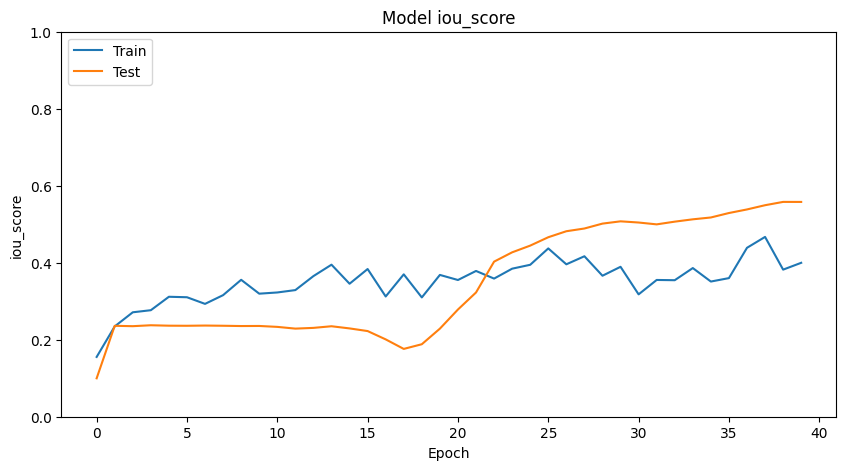

In [136]:
plt.figure(figsize=(10, 5))
plt.plot(history['iou_score'])
plt.plot(history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,1))

#### Model Predictions

In [33]:
def expand_greyscale_channels(image):
    image = np.expand_dims(image, -1)
    image = image.repeat(3, axis=-1)
    return image


def crop_center_square(image, im_size=480):
    size=im_size
    height, width = image.shape[:2]
    new_width = new_height = size
    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = left + new_width
    bottom = top + new_height
    cropped_image = image[top:bottom, left:right]
    return cropped_image

def transform_color(image):
    uniques = np.unique(image)
    
    for idx,elem in enumerate(uniques):
        mask = np.where(image == 1)
        image[mask] = 125
        mask2 = np.where(image == 2)
        image[mask2] = 255
    return image

def preprocess_prediction(image):
    image = expand_greyscale_channels(image)
    image = image.astype(np.float32)
    # will add a dimension that replaces batch_size
    image = np.expand_dims(image, axis=0)
    
    return image

In [34]:
def patch_predict(model, image, patch_size):
    """
    Predicts on image patches and recombines masks to whole image later.
    
    This function is inspired by
    https://github.com/bnsreenu/python_for_microscopists/blob/master/206_sem_segm_large_images_using_unet_with_custom_patch_inference.py
    
    """

    # initialize mask with zeros
    segm_img = np.zeros(image.shape[:2])
    patch_num=1
    # Iterates through image in steps of patch_size, operates on patches
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            single_patch = image[i:i+patch_size, j:j+patch_size]
            single_patch_shape = single_patch.shape[:2]
            single_patch = preprocess_prediction(single_patch)
            pr_mask = model.predict(single_patch)
            # removes batch dimension and channel dimension by replacing the latter with class with maximum probability value
            pr_mask_processed = np.argmax(pr_mask.squeeze(), axis=2)
            # make mask values visible
            fin = transform_color(pr_mask_processed)
            # recombine to complete image
            segm_img[i:i+single_patch_shape[0], j:j+single_patch_shape[1]] += cv2.resize(fin, single_patch_shape[::-1])
            print("Finished processing patch number ", patch_num, " at position ", i,j)
            patch_num+=1

    return segm_img

In [46]:
import segmentation_models as sm

def predict(img, im_size, weights, pref, backbone='resnet34', train_transfer='imagenet'):
    
    if not im_size==480:
        img = crop_center_square(img, 256)
    
    BACKBONE = backbone
    TRAIN_TRANSFER = train_transfer
    WEIGHTS = weights

    model = sm.Unet(BACKBONE, input_shape=(im_size, im_size, 3), classes=3, activation='softmax', encoder_weights=TRAIN_TRANSFER)
    model.load_weights(weights)
    segmented_image = patch_predict(model, img, im_size)
    #segmented_image = segmented_image.squeeze()
    visualize_ir(segmented_image)
    cv2.imwrite('E:/polar/code/data/ir/predicted/{}.png'.format(pref), segmented_image)

In [20]:
import netCDF4

ir_dir = 'E:/polar/code/data/flight9/IRdata_ATWAICE_processed_220718_142920.nc'

ds = netCDF4.Dataset(ir_dir)
imgs = ds.variables['Ts'][:]
timestamps = ds.variables['time'][:]

In [27]:
import pandas as pd
from datetime import timedelta

def extract_time(img_idx, timestamps):
    reference = '2022-07-18 00:00:00'

    times = pd.Series(timestamps)
    date = pd.Timestamp(reference)
    time = str(date + timedelta(seconds=int(times[img_idx])))

    return time

In [42]:
# prediction indexes (manually selected)
predict_idx = [27,157,371,493,878,957,1312,1552,1662,1788,1929,2028,2117,2241,2405,2424,2508,2596,2791,2857,2937,3122,3168,3329,3450,3718,3841,4056,4387,4572,4987]

imgs_predict = [imgs[i] for i in predict_idx]
time_predict = [timestamps[i] for i in predict_idx]

for idx, pr in enumerate(imgs_predict):
    pr = crop_center_square(pr,480)
    time = extract_time(predict_idx[idx], timestamps).replace(' ','_').replace(':','').replace('-','')
    plt.imsave('E:/polar/code/data/ir/predict/{}_{}.png'.format(time, predict_idx[idx]), pr, cmap='gray')


In [111]:
# change this for different images

im = cv2.imread('E:/polar/code/data/ir/predict/20220718_151518_2424.png', 0)
#im = cv2.imread('E:/polar/code/data/ir/predict/20220718_154230_4056.png', 0)

# 256
weights_baseline = 'best_modelprefinal_resnet.h5'
weights_inception = 'best_modelprefinal_inception.h5'
weights_mode0 = 'best_modelaugment_mode0.h5'
weights_mode1 = 'best_modelaugment_mode1.h5'
weights_mode2 = 'best_modelaugment_mode2.h5'
weights_mode4 = 'best_modelaugment_mode4.h5'

weights_32 = 'best_modelbaseline_32.h5'
weights_64 = 'best_modelbaseline_64.h5'
weights_128 = 'best_modelbaseline_128.h5'
weights_480 = 'best_modelbaseline_480.h5'
weights_scratch = 'best_modelscratch.h5'
weights_off2 = 'best_modeloffline2_mode1.h5'
weights_off5 = 'best_modeloffline5_mode1.h5'
weights_weighted = 'best_modelclass_imbalance.h5'

weights_base2 = 'best_modelbaseline2.h5'
weights_vgg = 'best_modelprefinal_vgg.h5'

weights_list = [weights_baseline, weights_inception, weights_mode0, weights_mode1, weights_mode2, weights_mode4, weights_32,
                weights_64, weights_128, weights_480, weights_scratch, weights_off2, weights_off5, weights_weighted, weights_base2,
                weights_vgg]

1/1 [==============================] - 12s 12s/step
Finished processing patch number  1  at position  0 0


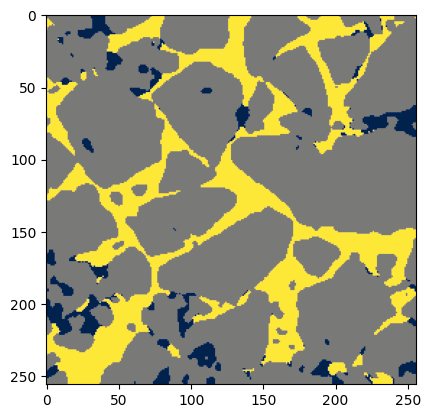

In [57]:
#predict(im, 256, weights_list[0], backbone='resnet34', train_transfer='imagenet', pref='baseline_2424')
predict(im, 256, weights_list[0], backbone='resnet34', train_transfer='imagenet', pref='baseline_4056')

1/1 [==============================] - 10s 10s/step
Finished processing patch number  1  at position  0 0


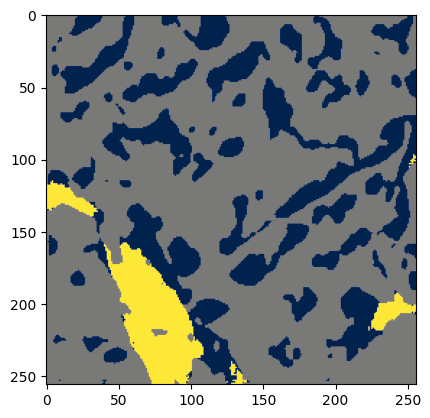

In [68]:
predict(im, 256, weights_list[2], backbone='resnet34', train_transfer='imagenet', pref='mode0_2424')
#predict(im, 256, weights_list[2], backbone='resnet34', train_transfer='imagenet', pref='mode0_4056')

1/1 [==============================] - 10s 10s/step
Finished processing patch number  1  at position  0 0


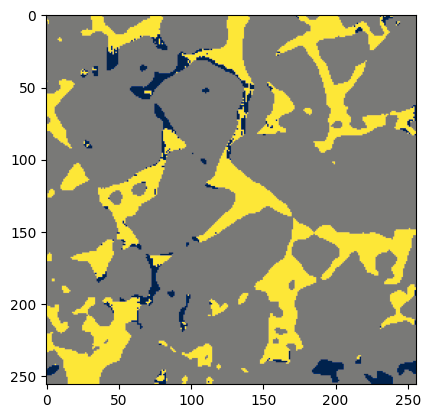

In [59]:
#predict(im, 256, weights_list[3], backbone='resnet34', train_transfer='imagenet', pref='mode1_2424')
predict(im, 256, weights_list[3], backbone='resnet34', train_transfer='imagenet', pref='mode1_4056')

1/1 [==============================] - 11s 11s/step
Finished processing patch number  1  at position  0 0


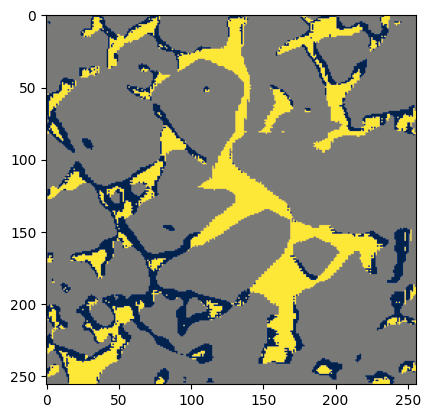

In [60]:
#predict(im, 256, weights_list[4], backbone='resnet34', train_transfer='imagenet', pref='mode2_2424')
predict(im, 256, weights_list[4], backbone='resnet34', train_transfer='imagenet', pref='mode2_4056')

1/1 [==============================] - 11s 11s/step
Finished processing patch number  1  at position  0 0


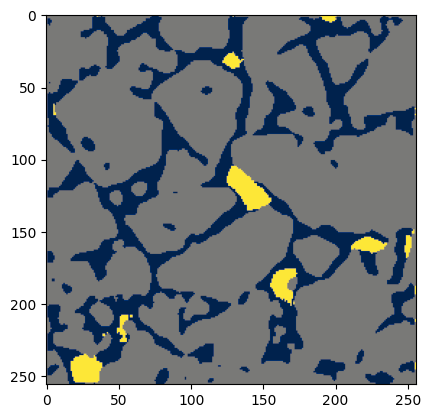

In [61]:
#predict(im, 256, weights_list[5], backbone='resnet34', train_transfer='imagenet', pref='mode4_2424')
predict(im, 256, weights_list[5], backbone='resnet34', train_transfer='imagenet', pref='mode4_4056')

1/1 [==============================] - 19s 19s/step
Finished processing patch number  1  at position  0 0


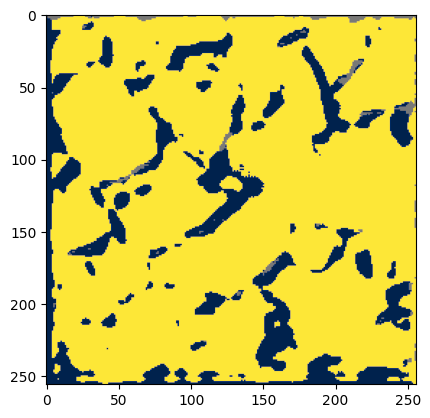

In [62]:
#predict(im, 256, weights_list[1], backbone='inceptionv3', train_transfer='imagenet', pref='inception_2424')
predict(im, 256, weights_list[1], backbone='inceptionv3', train_transfer='imagenet', pref='inception_4056')

1/1 [==============================] - 9s 9s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 1s 539ms/step
Finished processing patch number  2  at position  0 32
1/1 [==============================] - 1s 536ms/step
Finished processing patch number  3  at position  0 64
1/1 [==============================] - 1s 512ms/step
Finished processing patch number  4  at position  0 96
1/1 [==============================] - 0s 206ms/step
Finished processing patch number  5  at position  0 128
1/1 [==============================] - 0s 198ms/step
Finished processing patch number  6  at position  0 160
1/1 [==============================] - 0s 283ms/step
Finished processing patch number  7  at position  0 192
1/1 [==============================] - 0s 379ms/step
Finished processing patch number  8  at position  0 224
1/1 [==============================] - 0s 253ms/step
Finished processing patch number  9  at position  32 0
1/1 [=======================

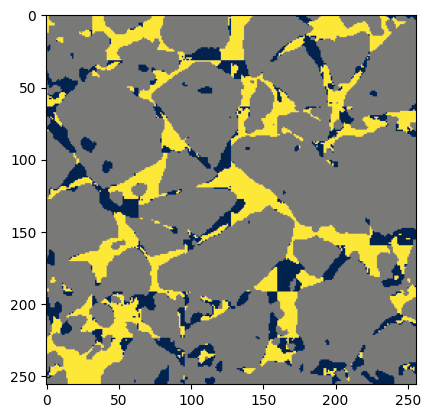

In [63]:
#predict(im, 32, weights_list[6], backbone='resnet34', train_transfer='imagenet', pref='32_2424')
predict(im, 32, weights_list[6], backbone='resnet34', train_transfer='imagenet', pref='32_4056')

1/1 [==============================] - 10s 10s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 0s 358ms/step
Finished processing patch number  2  at position  0 64
1/1 [==============================] - 0s 232ms/step
Finished processing patch number  3  at position  0 128
1/1 [==============================] - 0s 362ms/step
Finished processing patch number  4  at position  0 192
1/1 [==============================] - 0s 209ms/step
Finished processing patch number  5  at position  64 0
1/1 [==============================] - 0s 366ms/step
Finished processing patch number  6  at position  64 64
1/1 [==============================] - 0s 251ms/step
Finished processing patch number  7  at position  64 128
1/1 [==============================] - 0s 363ms/step
Finished processing patch number  8  at position  64 192
1/1 [==============================] - 0s 267ms/step
Finished processing patch number  9  at position  128 0
1/1 [=================

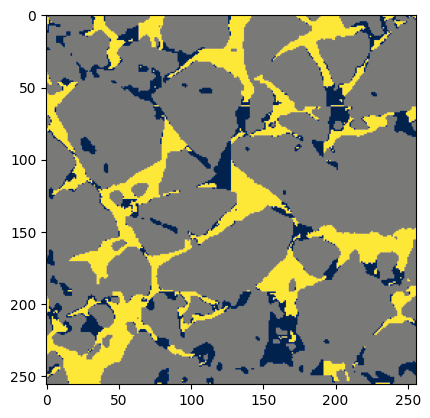

In [64]:
#predict(im, 64, weights_list[7], backbone='resnet34', train_transfer='imagenet', pref='64_2424')
predict(im, 64, weights_list[7], backbone='resnet34', train_transfer='imagenet', pref='64_4056')

1/1 [==============================] - 11s 11s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 1s 714ms/step
Finished processing patch number  2  at position  0 128
1/1 [==============================] - 1s 692ms/step
Finished processing patch number  3  at position  128 0
1/1 [==============================] - 1s 1s/step
Finished processing patch number  4  at position  128 128


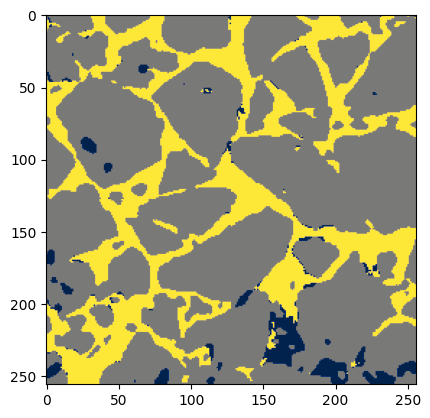

In [65]:
#predict(im, 128, weights_list[8], backbone='resnet34', train_transfer='imagenet', pref='128_2424')
predict(im, 128, weights_list[8], backbone='resnet34', train_transfer='imagenet', pref='128_4056')

1/1 [==============================] - 11s 11s/step
Finished processing patch number  1  at position  0 0


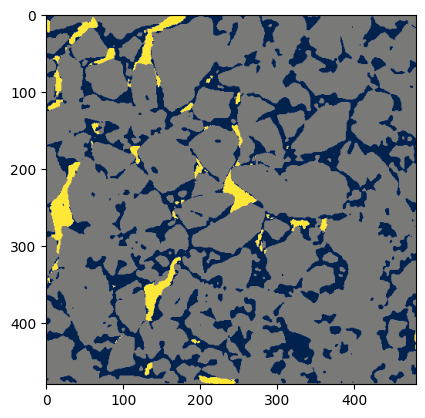

In [66]:
#predict(im, 480, weights_list[9], backbone='resnet34', train_transfer='imagenet', pref='480_2424')
predict(im, 480, weights_list[9], backbone='resnet34', train_transfer='imagenet', pref='480_4056')

1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0


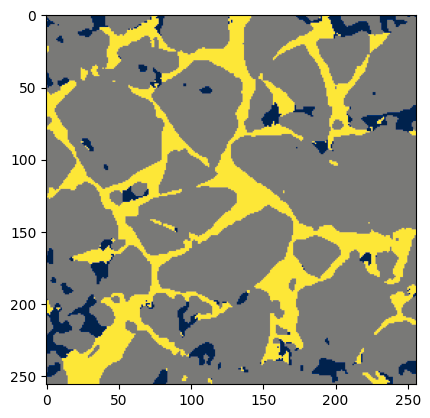

In [72]:
#predict(im, 256, weights_list[11], backbone='resnet34', train_transfer='imagenet', pref='offline2_2424')
predict(im, 256, weights_list[11], backbone='resnet34', train_transfer='imagenet', pref='offline2_4056')

1/1 [==============================] - 1s 1s/step
Finished processing patch number  1  at position  0 0


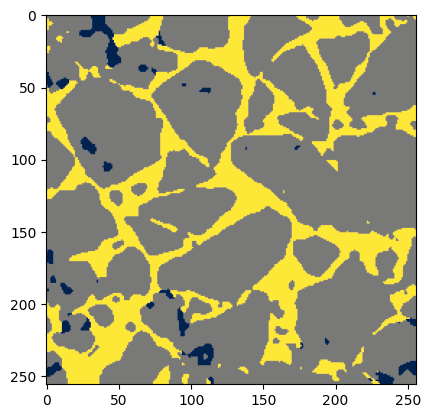

In [73]:
#predict(im, 256, weights_list[12], backbone='resnet34', train_transfer='imagenet', pref='offline5_2424')
predict(im, 256, weights_list[12], backbone='resnet34', train_transfer='imagenet', pref='offline5_4056')

1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0


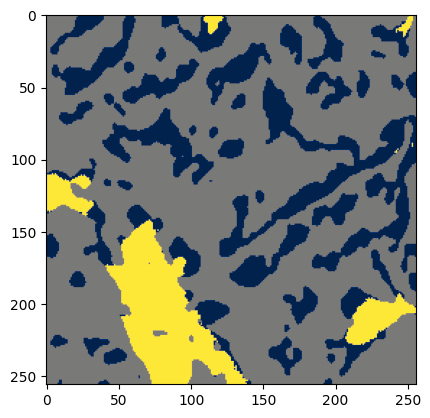

In [86]:
predict(im, 256, weights_list[10], backbone='resnet34', train_transfer=None, pref='scratch_2424')
#predict(im, 256, weights_list[10], backbone='resnet34', train_transfer=None, pref='scratch_4056')

1/1 [==============================] - 1s 1s/step
Finished processing patch number  1  at position  0 0


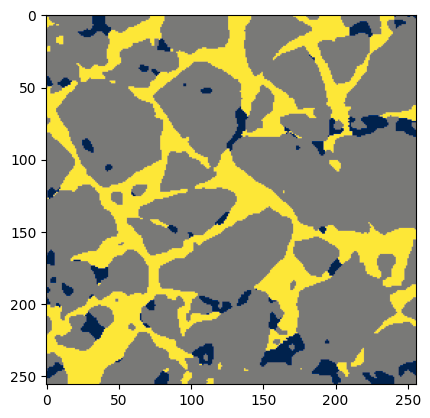

In [93]:
#predict(im, 256, weights_list[13], backbone='resnet34', train_transfer='imagenet', pref='weighted_2424')
predict(im, 256, weights_list[13], backbone='resnet34', train_transfer='imagenet', pref='weighted_4056')

In [108]:
#predict(im, 256, weights_list[14], backbone='resnet34', train_transfer='imagenet', pref='base2_2424')
predict(im, 256, weights_list[14], backbone='resnet34', train_transfer='imagenet', pref='base2_4056')

ValueError: Layer count mismatch when loading weights from file. Model expected 93 layers, found 209 saved layers.

1/1 [==============================] - 6s 6s/step
Finished processing patch number  1  at position  0 0


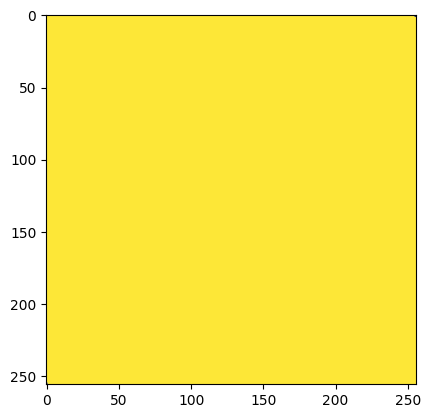

In [112]:
predict(im, 256, weights_list[15], backbone='vgg19', train_transfer='imagenet', pref='vgg_2424')
#predict(im, 256, weights_list[15], backbone='vgg19', train_transfer='imagenet', pref='vgg_4056')

In [ ]:
predict(im, 256, weights_list[16], backbone='resnet34', train_transfer='imagenet', pref='mode3_2424')
#predict(im, 256, weights_list[16], backbone='resnet34', train_transfer='imagenet', pref='mode3_4056')